<a href="https://colab.research.google.com/github/dataeducator/image_classification_with_deep_learning/blob/main/image_classification_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Submission:Image Classification Model with Deep Learning
(Phase 4)

- Student Name: Tenicka Norwood
- Program Pace: self paced
- Scheduled Project Review Time: Tues September 5, 2023 1pm
- Instructor name: Morgan Jones
- Blog post Url: https://medium.com/mlearning-ai/fueling-student-success-1723abd2991b

#### __Disclaimer:__
This Jupyter notebook and its contents are __intended solely for educational purposes__. The included business case and the results of the deep learning models should not be interpreted as medical advice, and have not received endorsement or approval from any professional or medical organization.

The models and outcomes presented here are for illustrative purposes __only__ and should __not__ be be utilized for making real-world decisions without consulting appropriate domain experts and medical professionals. Any actions taken based on the information in this notebook are at the user's own risk.
The author and contributors off this noteboo disclaim any liability for the accuracy, completeness, or efficacy of the information provided.

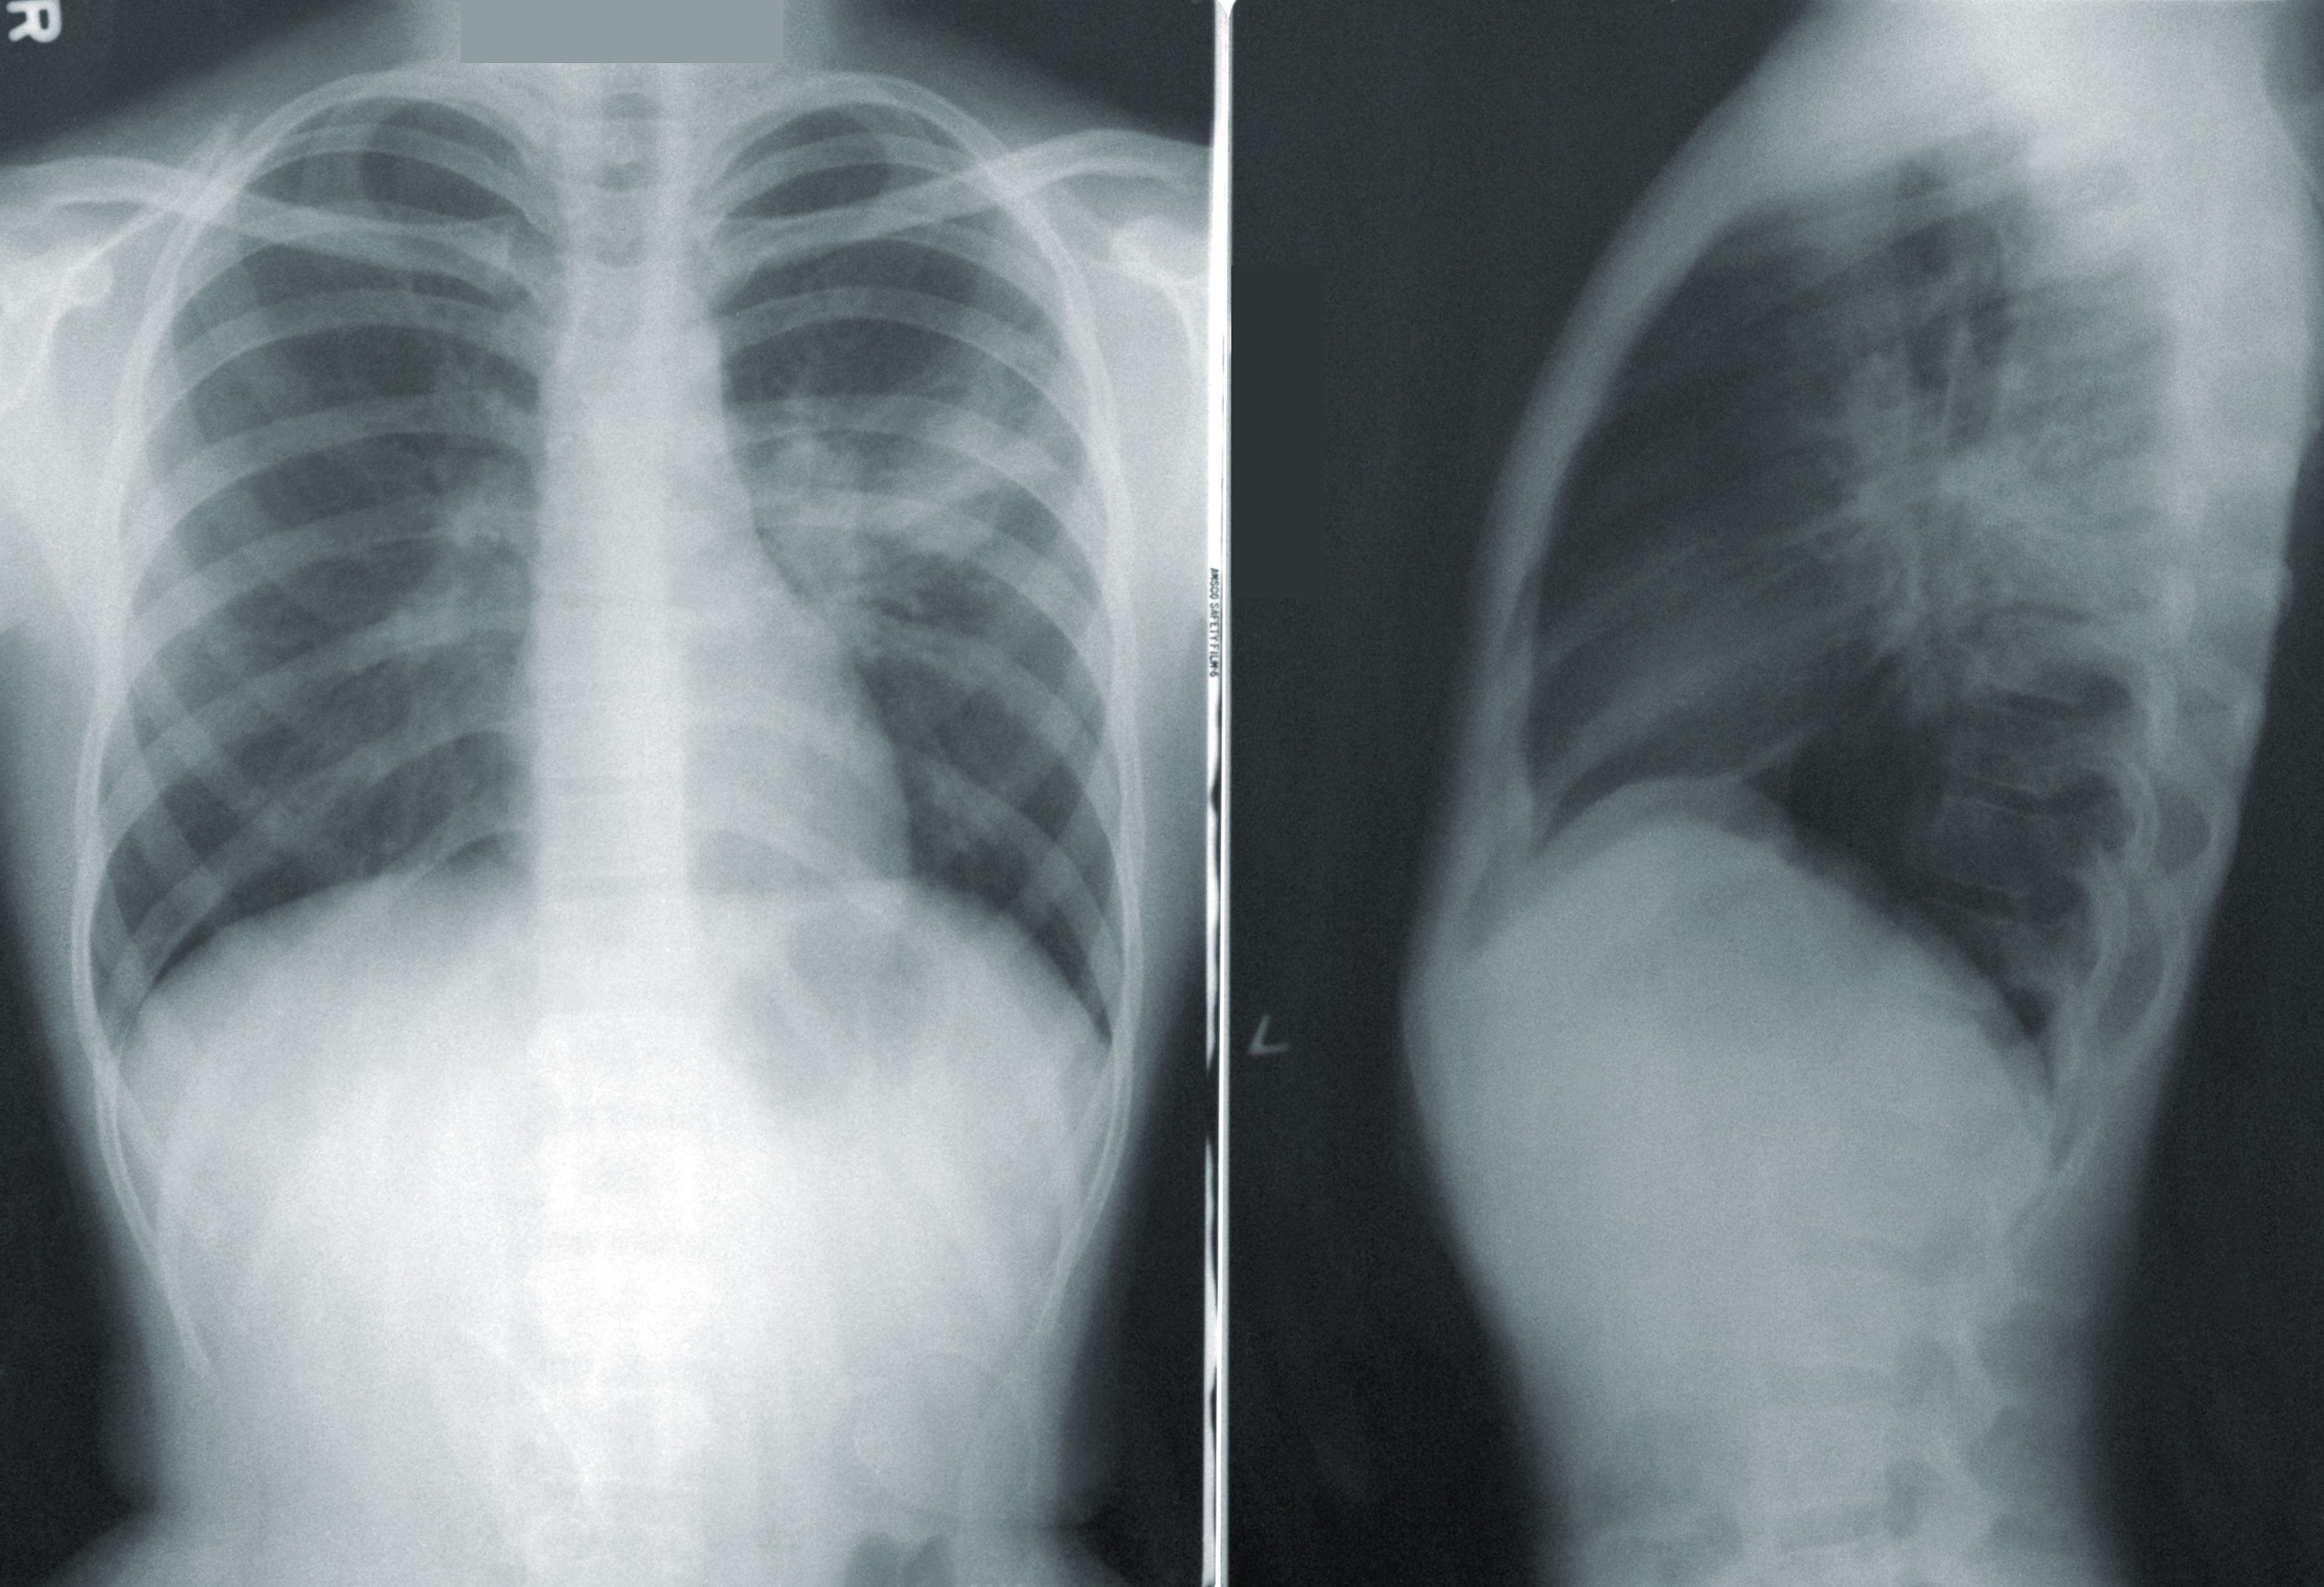





## __Business Case:__
* __Stakeholer__: Zephyr Health Services
* __Business Case__: I am a new data scientist at Zephyr Healthcare Solutions and have been taked with leveraging deep learnin to bolster the company's medical diagnostic systems. Zephyr's obective is to create an optimized Convolutional Neural Network (CNN) for precise pneumonia detection from chest X-ray images, aligning with our commitment to advancing diagnostic accuracy and patient care.

According to a 2022 report (click [here](https://www.jhsph.edu/ivac/wp-content/uploads/2019/10/PDPR_2022.pdf) for full report) by Johns Hopkins over _700 thousand children under 5__ die from pneumonia each year.

Objectives:
The main objectives of this project are:
- Develop a robust and efficient system for early childhood pneumonia detection using a Convolutional Neural Network(CNN) which detects the presence of pneumonia with a __high degree__ of precision.
- Generate a system that can be validated and deployed across a variety of healthcare settings, to reach underserved populations.


## __Metrics__
We will prioritize precision in this project over accuracy. We will also aim for balance between recall (sensitivity) while maintaining a high level of precision (specificity). With these objectives in mind, the  we aim to reduce the number of false positives and increase the model's ability to correctly identify patients with pneumonia. In this context, false positives could lead to unecessary treatment or interventions.
* __True positives__ are the cases when a model predicts positive instances correctly.
Ex. patients predicted to have PNEUMONIA and do have PNEUMONIA

*__False positives__ are the cases when a model predicts positive instances incorrectly.
Ex. patients predicted to have PNEUMONIA but the chest scan label is NORMAL.

*__False negatives__ are the cases when a model mispredicts negative instances.
Ex. patients predicted to have NORMAL chest scans and do have PNEUMONIA.

\begin{gathered}   
Precision =  \frac{True\ Positive}{True\ Positive + False\ Positive}
\end{gathered}
<br>

</br>

A high precision indicates that when our model predicts the presence of PNEUMONIA, the patient will likely have PNEUMONIA.
<br>

</br>
\begin{gathered}
Recall = \frac{True\ Positive}{False\ Negative + True\ Positive}
\end{gathered}
<br>

</br>

A high precision indicates that when our model predicts the presence of PNEUMONIA, the patient will likely have PNEUMONIA.

For our project we will use F1-score or the harmonic mean of recall and precision.

\begin{gathered}
F1-Score  = \frac{2 \cdot True\ Positive}{2 \cdot True\ Positive + False\ Positive + False\ Negative}
\end{gathered}

Our model will be successful where:

\begin{gathered}
F1-Score  >= .95
\end{gathered}

## __Data Understanding__

Chest X-ray images (anterior-posterior) were chose from cohorts of pediatric patients aged one to five years at the Guangzhou Women and Children's Medical Center in Guangzhou, China.

The images were obtained during routine clincial care. To ensure quality, all chest radiographs went through an initial screening to remove low-quality or unreadable scans.

Squsequently, two expert physicians grades the diagnoses of the images before they were used in training sets.

A third expert reviewed the validation set to mitigate any potential grading errors.

The dataset is orginally accredited to Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2.


For ease of use we will use Kaggle to access a zip archive of this dataset later in this section.

### __Method__:
In this project, I will use the __OSEMiN__ pipeline to:

- Obtain → Import the data.
- Scrub → Manage the datatypes, and resolve missing data or duplicates.
- Explore → Identify patterns within the relationships between variables in the data.
- Model → Create a set of predictive models.
- iNterpret → Identify insights and create visualizations of findings.

For our model we could prioritize:

- accuracy - the proportion of correctly predicted labels out of all of the samples in the testing dataset.
- precision - measures the model's accuracy in predicting true positives as a proportion of all positives.
- recall- measures the model's ability to measure all positive instances correctly.
- f1-score - the harmonic mean of precision and recall, used when we want to consider both identifying true positives and minimizing false negatives.

# __Obtain__

### __ObtainData Class Description__

The <code>ObtainData</code> class is a utility class designed to retrieve datasets stored in Google Drive. This class provides an approach to mount Google Drive, verify the existence of a specified dataset folder, and extract its contents if necessary.

__Features:__
* Mounts Google Drive to the Colab environment, providing a user allows access to the files stored in thier Google Drive.
* Prompts the user to input the location of the dataset folder within their Google Drive
* Checks to see if the specified dataset folder exists and provides feedback to the user.
* If the dataset folder exists, this class provides a convenient way to access the dataset files.

__Usage:__
* Create an instance of the <code>ObtainData</code> class.
* Invoke the <code>get_dataset_location()</code> method to prompt the user to input the location of the dataset folder in their Google Drive.
* The class automatically verifies the existence of the specified folder and provides feedback accordingly.
* The dataset files can then be accessed and processed as needed.

In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5c6fdee5c347a5026b860708d1c2413027f160c8df4c1de2ad5507fc8fde4840
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


### Import libraries and Visualization Packages
Importing libraries at the beginning allows access to modules and other tools throughout this project that help to make the tasks within this project manageable to implement. The main libraries used within this project include:

* <code>pandas</code>: a data analysis and manipulation library which allows for flexible reading, writing, and reshaping of data
* <code>numpy</code>: a key library that brings the computational power of languages like C to Python
* <code>matplotlib</code>: a comprehensive visualization library
* <code>seaborn</code>: a data visualization library based on matplotlib
* <code>tensorflow</code>: an open-source machine learning library developed by Google that enables the creation and training of machine learning models through computational graphs
* <code>keras</code> a key component of TensorFlow's ecosystem that provides a modular interface to design, build and train deep learning models
* <code>sklearn</code>: a machine learning libary for data processing and modeling.
*<code>lime</code> Local Interpretable Model-agnostic Explanations is a library designed to provide clear explanations for machine learning model predictions.

In [2]:
# Import libraries and visualization packages
import lime
from lime import lime_base, lime_image
from skimage.segmentation import mark_boundaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import cv2, time
import datetime
import os
import shutil
import math
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, InceptionV3, resnet50
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

## Check library versions
Ensuring the reporducibility of results stands as a cornerstone of effective modeling. In the ever-evolving landscape of information, the refinement of models remains integral to advancing science. An inherent facet of collaborative success lies in transparently conveying the tool versions employed in model generation. This practice not only facilitates seamless collaboration but also equips fellow researchers with a foundation for their own endeavors to replicate this work. As such, we  document the versions of key libraries so that others may replicate and explore this data.

In [3]:
# Check Pandas version
print("Pandas version")
pd.__version__

Pandas version


'1.5.3'

In [4]:
# Check Numpy version
print("Numpy version")
np.__version__

Numpy version


'1.23.5'

In [5]:
# Check Seaborn version
print("Seaborn version")
sns.__version__

Seaborn version


'0.12.2'

In [6]:
# Check Tensorflow version
print("Tensorflow version")
tf.__version__

Tensorflow version


'2.12.0'

# Downloading and Preparing Pneumonia Dataset for Deep Learning Analysis
1. __Create or Log in to Your Kaggle Account:__
    If you do not already have a Kaggle account, create one. If you have an account log in.
2. __Access the Pneumonia Dataset:__
    Go to the following direct link to access Paul Timothy Mooney's Pneumonia dataset on Kaggle: [Pneumonia Dataset](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)
3. __Download the Dataset:__
    On the dataset page, you will see a "Download" button. Click on it to download the dataset.

     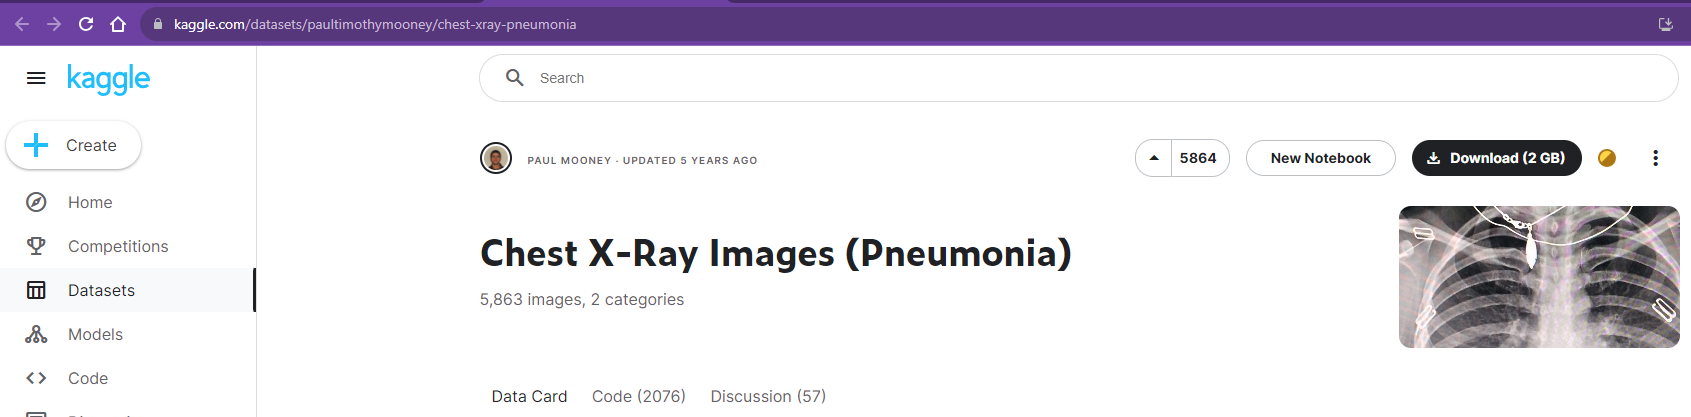
   
    The dataset is approximately __2GB__.

4. __Unzip the file Add the unzipped archive to your Google Drive:__
    After downloading and unzipping the dataset you'll have a folder named 'archive'. This folder contains the dataset. To use this notebook you will need to provide the location of the .zip file in your Google Drive.

5. __Run the next two cells without making any chages__
    Mount your google drive to allow colab access to your google drive.
    Unzip the file so you can use the contents of this notebook.
    The file should include train, test and val folders that contain subfolders with both NORMAL and PNEUMONIA images.

In [7]:
# Run cell without making any changes
from google.colab import drive

class ObtainData:
  """
  A class to obtain dataset location from Google Drive.

  Usage:
  data_obtainer = ObtainData()
  dataset_location = data_obtainer.get_dataset_location()
  """

  def __init__(self):
      self.drive_mounted = False

  def mount_drive(self):
    """
    Mounts Google Drive to '/content/drive'.
    """
    drive.mount('/content/drive')
    self.drive_mounted = True

  def get_dataset_location(self):
    """
    Prompts the user to enter the location of the datset folder in their Google Drive.
    Returns the full file path of the dataset location.
    """

    while True:
      # Munt Google Drive if not already mounted
      if not self.drive_mounted:
        self.mount_drive()

      # Provide a template for the user input
      example_input ="/MyDrive/Your_Folder_name/"
      dataset_location = input(f"Enter the location of the dataset folder in your Google Drive (e.g., {example_input}):")
      file_path = f'/content/drive{dataset_location}'

      # Check if the file exists
      if os.path.exists(file_path):
        print(f" The file '{dataset_location}' exists in your Google Drive.")
        return file_path
      else:
        print(f" The file '{dataset_location}' does not exist in your Google Drive. Please try again.")


In this section, we will set up a convenient way to access the dataset using the <code>ObtainData</code> class. This will help us to smoothly acquire the dataset's location from the connected Google Drive by interacting with the user using prompts. This step ensures that the required data is available for analysis.

In [8]:
# Run cell without making any changes
# Create an instance of the ObtainData class
data_obtainer = ObtainData()

# Get the dataset location
dataset_location = data_obtainer.get_dataset_location()
print(f"Datatset location")

Mounted at /content/drive
Enter the location of the dataset folder in your Google Drive (e.g., /MyDrive/Your_Folder_name/):/MyDrive/classification/chest_xray
 The file '/MyDrive/classification/chest_xray' exists in your Google Drive.
Datatset location


Next we check the current working directory and if ensure that we are working in the dataset's location.

In [9]:
print(os.getcwd())

/content


In [10]:
os.chdir(dataset_location)
print(os.getcwd())

/content/drive/MyDrive/classification/chest_xray


### __DatasetPaths Class Description__
The <code>DatasetPaths</code> class is a utility class for managing paths within a dataset. This class simplifies file path retrieval and ensures efficient data handling. It alllows users to access specific file paths based on set names and class names.

__Features:__
* Defines attributes for different subsets(e.g. train, test, val) and class names(e.g. NORMAL and PNEUMONIA) in a dataset.
* Enables streamlined access to file paths for specific subsets and classes, reducing the complexity of file handling
* Offers a structured approach to organize and retrieve file paths, enhancing data manipulation and analysis.

__Usage:__
* Create an instance of the <code>DatasetPaths</code> class
* Utilize the attributes defined in the class to easily access file paths for different subsets and classes within the dataset.


In [11]:
class DatasetPaths:
  """
  Helper class to manage paths for different sets and classes of the dataset
  """

  def __init__(self, base_location):
    self.base_location = base_location
    self.class_names = ['NORMAL', 'PNEUMONIA']
    self.set_names = ['train', 'test', 'val']

  def get_single_path(self, set_name):
      return os.path.join(self.base_location, set_name)
  def get_path(self,set_name, class_name):
    """
    Get the path for a specific set and class.

    Parameters:
        set_name(str): Name of the dataset set('train', 'test', 'val')
        class_name(str): Name of the class ('NORMAL' or 'PNEUMONIA')

    Returns:
        path(str): Path to the specified set and class.
    """
    return f"{self.base_location}/{set_name}/{class_name}"

  def get_all_paths(self):
    """
    Get a dictionary containing all paths for the dataset.

    Returns:
      paths(dict): Dictionary containing paths for each set and class.
    """

    paths = {}
    for set_name in self.set_names:
        paths[set_name] = {}
        for class_name in self.class_names:
          paths[set_name][class_name] = self.get_path(set_name, class_name)
    return paths


Here we create an instance of <code>DatasetPaths</code> class. This helps us establish the base location of the dataset in Google Drive. We use this to identify the location

In [12]:
# Provide the base location of the dataset in Google Drive
base_dataset_location = dataset_location

# Create an instance of the DatasetPaths class
dataset_paths = DatasetPaths(base_dataset_location)

# Get all paths using the DatasetPaths instance
all_paths = dataset_paths.get_all_paths()

# Print the paths
for set_name in dataset_paths.set_names:
    for class_name in dataset_paths.class_names:
        print(f"{set_name.capitalize()} {class_name}: {all_paths[set_name][class_name]}")


Train NORMAL: /content/drive/MyDrive/classification/chest_xray/train/NORMAL
Train PNEUMONIA: /content/drive/MyDrive/classification/chest_xray/train/PNEUMONIA
Test NORMAL: /content/drive/MyDrive/classification/chest_xray/test/NORMAL
Test PNEUMONIA: /content/drive/MyDrive/classification/chest_xray/test/PNEUMONIA
Val NORMAL: /content/drive/MyDrive/classification/chest_xray/val/NORMAL
Val PNEUMONIA: /content/drive/MyDrive/classification/chest_xray/val/PNEUMONIA


Next let's leverage the methods and attributed of the <code>DatasetPaths</code> class to obtain paths and print the number of images for each set and each class.

In [13]:
# Create a dictionary to store the number of images in each class for each set
num_images_dict = {}

# Loop through sets and classes to count images
for set_name in dataset_paths.set_names:
    num_images_dict[set_name] = {}
    for class_name in dataset_paths.class_names:
        # Get the path using the DatasetPaths class
        path = dataset_paths.get_path(set_name, class_name)

        # Count the number of images in the directory
        num_images = len(os.listdir(path))

        # Store the count in the num_images_dict
        num_images_dict[set_name][class_name] = num_images

        # Print the count
        print(f" {set_name.capitalize()} {class_name}: {num_images} images")

 Train NORMAL: 1341 images
 Train PNEUMONIA: 3875 images
 Test NORMAL: 234 images
 Test PNEUMONIA: 390 images
 Val NORMAL: 8 images
 Val PNEUMONIA: 8 images


In this section, we used the <code>DatasetPaths</code> class to calculate and display the distributeion of images across different sets and classess within the dataset. The output displays the number of images for each combination of training, testing, and validation sets along with the two class categories: 'NORMAL' and 'PNEUMONIA'. Next, we will create a visualization to get a quick view of the dataset's composition.

__ClassDistributionPlot Class Description__

The <code>ClassDistributionPlot</code> class is a helper class designed to create bar plot to visualize the distribution of classes across different dataset sets.

__Features:__
* Uses the <code>DatasetPaths</code> class to manage and access dataset paths.
* Accepts a dictionary containing the count of images per class for each dataset set.
* Aligns bars for each class for comparison
* Adopts the <code>fivethirthyeight</code> style for consistency.

__Usage:__
1. Create an instance of the <code>DatasetPaths</code> class.
2. Create an instance of the <code>ClassDistributionPlot</code> class, providing a dictionary with the class distribtion data.
3. Use the <code>plot()</code> method to generate bar plots that illustrate class distribution across different sets.

In [14]:
class ClassDistributionPlot:
    """
    Helper class to create class distribution plots for different dataset sets.
    """

    def __init__(self, dataset_paths, set_names, class_names):
        """
        Initialize the ClassDistributionPlot instance.

        Parameters:
            dataset_paths (DatasetPaths): An instance of the DatasetPaths class.
            set_names (list): List of dataset set names ('train', 'test', 'val').
            class_names (list): List of class names.
        """
        self.dataset_paths = dataset_paths
        self.set_names = set_names
        self.class_names = class_names

    def plot_distribution(self):
        """
        Create and display class distribution plots for different dataset sets.
        """
        plt.style.use('fivethirtyeight')
        plt.figure(figsize=(10, 8))
        x = range(len(self.class_names))

        for i, set_name in enumerate(self.set_names):
            num_images_per_class = [
                len(os.listdir(self.dataset_paths.get_path(set_name, class_name)))
                for class_name in self.class_names
            ]
            plt.bar([j + i * 0.2 for j in x], num_images_per_class, width=0.2,
                    align='center', label=set_name.capitalize())

        plt.xlabel('Class')
        plt.ylabel('Number of Images')
        plt.title('Class Distribution Across Sets')
        plt.xticks([i + 0.2 for i in x], self.class_names)
        plt.legend()

        plt.tight_layout()
        plt.show()

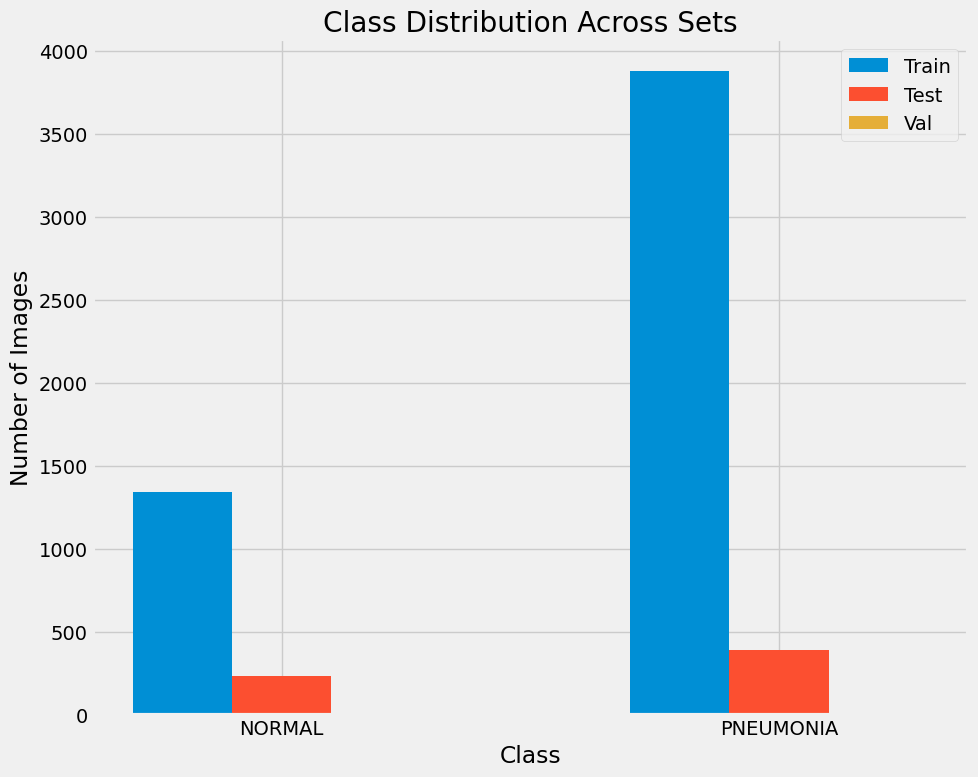

In [15]:
# Extract class names and corresponding number of images for each class
set_names = dataset_paths.set_names
class_names = dataset_paths.class_names
num_images_per_class = {
    'train': [num_images_dict['train'][class_name] for class_name in class_names],
    'test': [num_images_dict['test'][class_name] for class_name in class_names],
    'val': [num_images_dict['val'][class_name] for class_name in class_names]
}

# Create an instance of the ClassDistributionPlot class
distribution_plot = ClassDistributionPlot(dataset_paths, set_names, class_names)

# Plot and display class distribution
distribution_plot.plot_distribution()

There is a noticeable class imbalance in the training image set, with the PNEUMONIA class containing almost 3 times as many images as the NORMAL class.
There are an equal number(8) of each class in the validation set which is much smaller than either the testing or training set.

In [16]:
from IPython.lib.display import exists
import random

class ImageBalancer:
    """
    Helper class to balance the number of images between different classes in a dataset.
    """

    def __init__(self, dataset_paths, class_names, set_names, target_set_name):
        """
        Initialize the ImageBalancer instance.

        Parameters:
            dataset_paths (DatasetPaths): An instance of the DatasetPaths class.
            class_names (list): List of class names.
            set_names (list): List of dataset set names ('train', 'test', 'val').
            target_set_name (str): The name of the dataset set to balance.
        """
        self.dataset_paths = dataset_paths
        self.class_names = class_names
        self.set_names = set_names
        self.target_set_name = target_set_name

    def balance_images(self):
        """
        Balance the number of images between classes in the target dataset set.
        """
        target_set_path = self.dataset_paths.get_path(self.target_set_name, '')

        # Find the desired number of images as the minimum number of images in subfolders of each class
        desired_num_images = min(
            [len(os.listdir(self.dataset_paths.get_path(self.target_set_name, class_name))) for class_name in self.class_names]
        )

        for class_name in self.class_names:
            class_images = os.listdir(self.dataset_paths.get_path(self.target_set_name, class_name))

            # Check if the number of images in this class exceeds desired_num_images
            if len(class_images) > desired_num_images:
                random_class_images = random.sample(class_images, desired_num_images)

                new_class_path = os.path.join(target_set_path, class_name + '_downs')
                os.makedirs(new_class_path, exist_ok=True)

                for image in random_class_images:
                    src = os.path.join(self.dataset_paths.get_path(self.target_set_name, class_name), image)
                    dst = os.path.join(new_class_path, image)
                    shutil.copy(src, dst)
        # Create a new directory to store the balanced training images
        new_train_path = os.path.join(self.dataset_paths.base_location, 'train_downs')
        os.makedirs(new_train_path, exist_ok=True)

        # Copy the balanced PNEUMONIA images to the new balanced training directory
        shutil.copytree(self.dataset_paths.get_path(self.target_set_name, 'PNEUMONIA_downs'),
                        os.path.join(new_train_path, 'PNEUMONIA'))

        # Copy the original NORMAL images to the new balanced training directory
        shutil.copytree(self.dataset_paths.get_path(self.target_set_name, 'NORMAL'),
                        os.path.join(new_train_path, 'NORMAL'))

Next we created an instance of the `ImageBalancer` class, which is a custom helper class designed to balance the number of images between different classes in a dataset. This instance is named `image_balancer`.

### Overview

The `ImageBalancer` class is a useful tool for addressing class imbalance issues in datasets commonly encountered in machine learning and computer vision tasks. By evenly distributing the number of images across classes within a specified dataset set (e.g., 'train', 'test', 'val'), it helps improve the training and evaluation of machine learning models.

### Initialization

To create the `image_balancer` instance, we provided the following parameters during initialization:

- `dataset_paths`: An instance of the `DatasetPaths` class, which likely contains paths to the dataset.
- `class_names`: A list of class names, representing the different categories or classes in the dataset.
- `set_names`: A list of dataset set names, typically including 'train', 'test', and 'val'.
- `target_set_name`: The name of the dataset set that we want to balance, in this case, 'train'.

### Balancing Images

The primary purpose of this instance is to balance the number of images in the 'train' dataset set. It accomplishes this by ensuring that each class within the 'train' set has an equal number of images, which is determined by the class with the fewest images.

The `balance_images` method of the `image_balancer` instance performs the following steps:

1. It calculates the desired number of images as the minimum number of images in subfolders of each class.
2. For each class, if the number of images exceeds the desired number, it randomly selects a subset of images to keep.
3. The selected images are then copied to a new directory, named after the class with '_resampled' appended, within the 'train' set.
4. Finally, it creates a new directory called 'resampled_train' and copies the balanced 'PNEUMONIA' and original 'NORMAL' images into this directory.

By using this instance, we ensure that our 'train' dataset set is balanced, providing a more equitable representation of different classes and potentially improving the performance of our machine learning models.

Let's proceed with the image balancing process using the `image_balancer` instance.


In [17]:
# Create an instance of the ImageBalancer class
image_balancer = ImageBalancer(dataset_paths, class_names, set_names, target_set_name='train')

# Balance the images in the target dataset
image_balancer.balance_images()



Next, we will visualize the distribution of classes within a specific dataset set, specifically the 'resampled_train' set. To achieve this, we'll be using an instance of the `ClassDistributionPlot` class, which is a custom class designed for visualizing class distributions in a dataset. The code snippet below demonstrates how we set up and utilize this class instance.

### Set and Class Names

Before proceeding with the visualization, we define the following essential components:

- **Set Names**: We specify the dataset set we want to visualize, which, in this case, is 'resampled_train.' This set typically represents our balanced training data.

- **Class Names**: We provide a list of class names that correspond to the categories or classes within the 'resampled_train' dataset set. In this example, we have two classes: 'NORMAL' and 'PNEUMONIA.'

### Class Distribution Plot Instance

To create a visual representation of the class distribution, we instantiate the `ClassDistributionPlot` class. This class is designed to take the dataset paths, set names, and class names as input and generate a meaningful plot illustrating the distribution of samples across classes.

```python
# Define the set and class names
set_names = ['resampled_train']
class_names = ['NORMAL', 'PNEUMONIA']

# Create an instance of the ClassDistributionPlot class
distribution_plot = ClassDistributionPlot(dataset_paths, set_names, class_names)

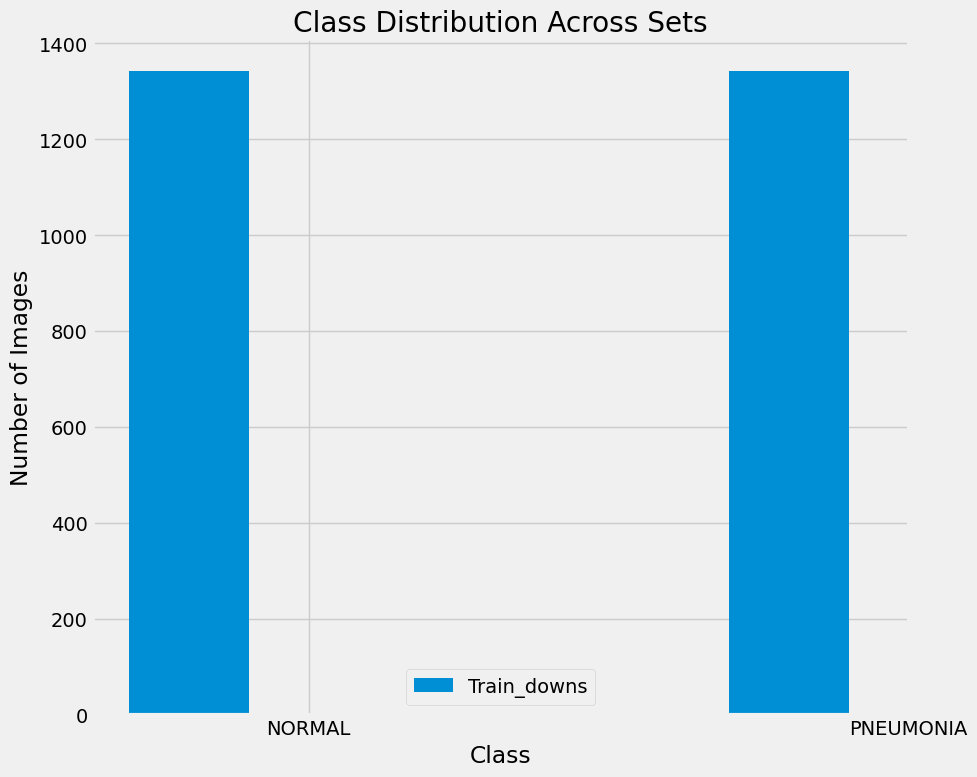

In [18]:
#Define the set and class names
set_names = ['train_downs']
class_names = ['NORMAL', 'PNEUMONIA']

# Create an instance of the ClassDistributionPlot class
distribution_plot = ClassDistributionPlot(dataset_paths, set_names, class_names)

# Plot the distribution of the resampled training data
distribution_plot.plot_distribution()

Next we will implement The `ScrubData` class for preprocessing our images.

### Key Features

The `ScrubData` class provides the following key features:

1. **Count Images**: It counts the number of images in each class for different sets (e.g., training, testing, validation) within your dataset.

2. **Create Data Generator**: It creates data generators using the Keras `ImageDataGenerator` class, simplifying the configuration of data augmentation and normalization.

3. **Plot Sample Images**: It enables you to visualize sample images from your dataset for a specified class, aiding in data exploration and understanding.

### Usage

Here's how you can use the `ScrubData` class:

* Initialize the ScrubData instance with your dataset location and optional parameters
    - <code>base_dataset_location = '/path/to/your/dataset'
    - scrubber = ScrubData(base_dataset_location)</code>

* Count images in different sets

* Create data generators

* Plot sample images for data exploration

# Scrub

In [19]:
import random
from keras.preprocessing.image import ImageDataGenerator

class ScrubData:
    def __init__(self, base_dataset_location, image_size=(224, 224), class_names=['NORMAL', 'PNEUMONIA']):
        self.base_dataset_location = base_dataset_location
        self.image_size = image_size
        self.class_names = class_names
        self.batch_size_train = self.count_images('train_downs')
        self.batch_size_test = self.count_images('test')
        self.batch_size_val = self.count_images('val')

    def count_images(self, set_name):
        counts = {}
        set_path = os.path.join(self.base_dataset_location, set_name)

        for class_name in self.class_names:
            class_path = os.path.join(set_path, class_name)
            if os.path.exists(class_path):
                num_images = len(os.listdir(class_path))
                counts[class_name] = num_images

        return counts

    def create_data_generator(self, directory, batch_size):
        normalization_params = {
            'NORMAL': {'rescale': 1.0 / 255.0},
            'PNEUMONIA': {'rescale': 1.0 / 255.0}
        }

        class_mode = 'binary'

        return ImageDataGenerator(**normalization_params[class_name]).flow_from_directory(
            directory,
            target_size=self.image_size,
            batch_size=batch_size,
            class_mode=class_mode,
            seed=42
        )

    def plot_sample_images(self, data_generator, class_name, num_images=16, num_rows=4, num_cols=4, figsize=(10, 10)):
        class_index = self.class_names.index(class_name)
        class_indices = [index for index, label in enumerate(data_generator.labels) if label == class_index]
        random_class_indices = random.sample(class_indices, num_images)

        plt.figure(figsize=figsize)
        plt.suptitle(class_name, fontsize=16)

        for i, index in enumerate(random_class_indices):
            plt.subplot(num_rows, num_cols, i + 1)
            image = data_generator._get_batches_of_transformed_samples([index])[0][0]
            plt.imshow(image)
            plt.axis('off')

        # Add an empty subplot for the white space
        plt.subplot(num_rows, num_cols, num_images + 1)
        plt.axis('off')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


# Explore

Found 2682 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


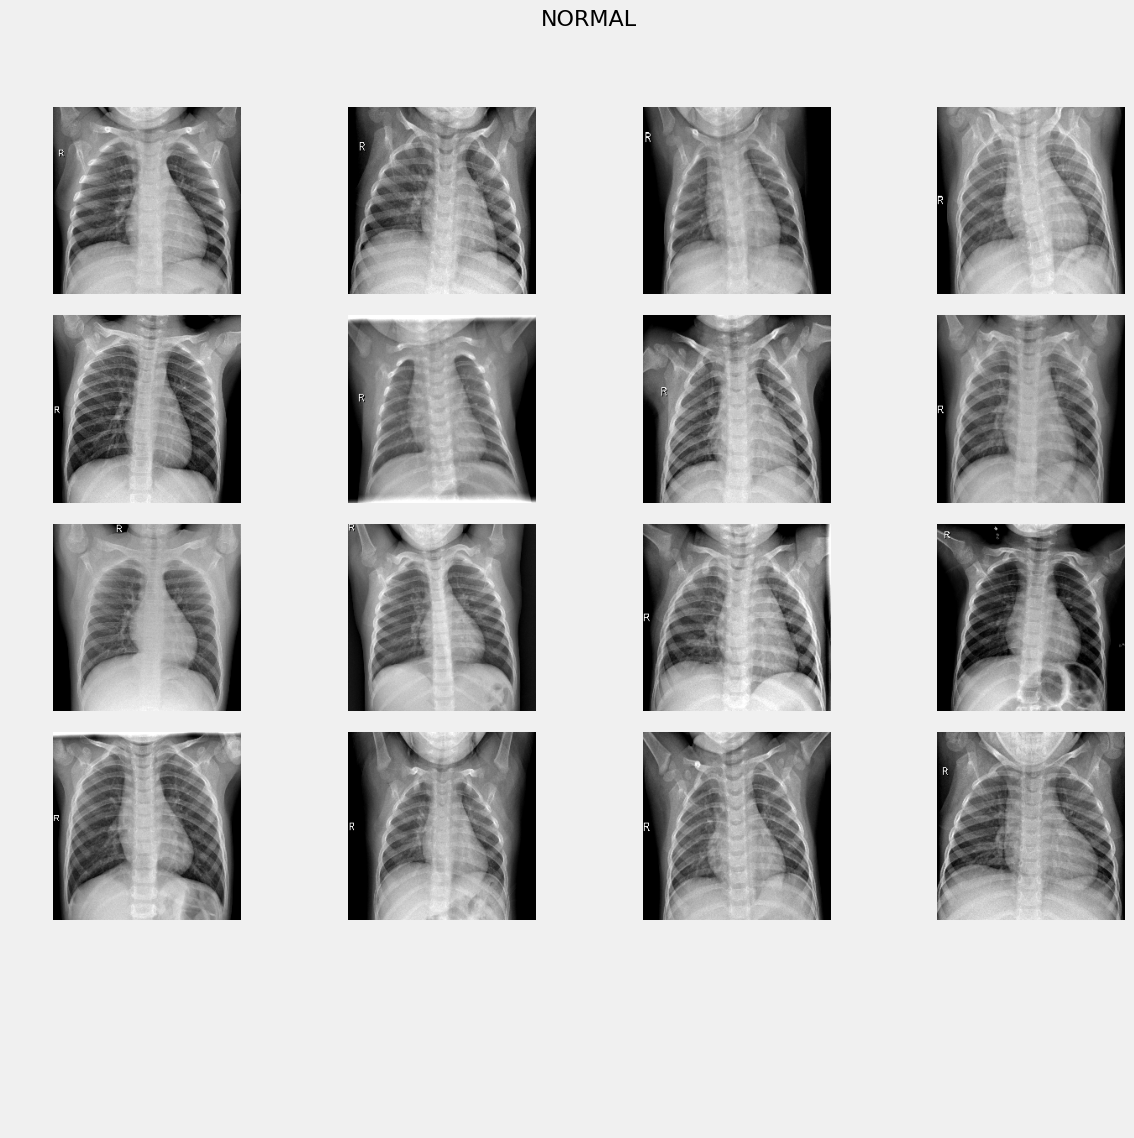

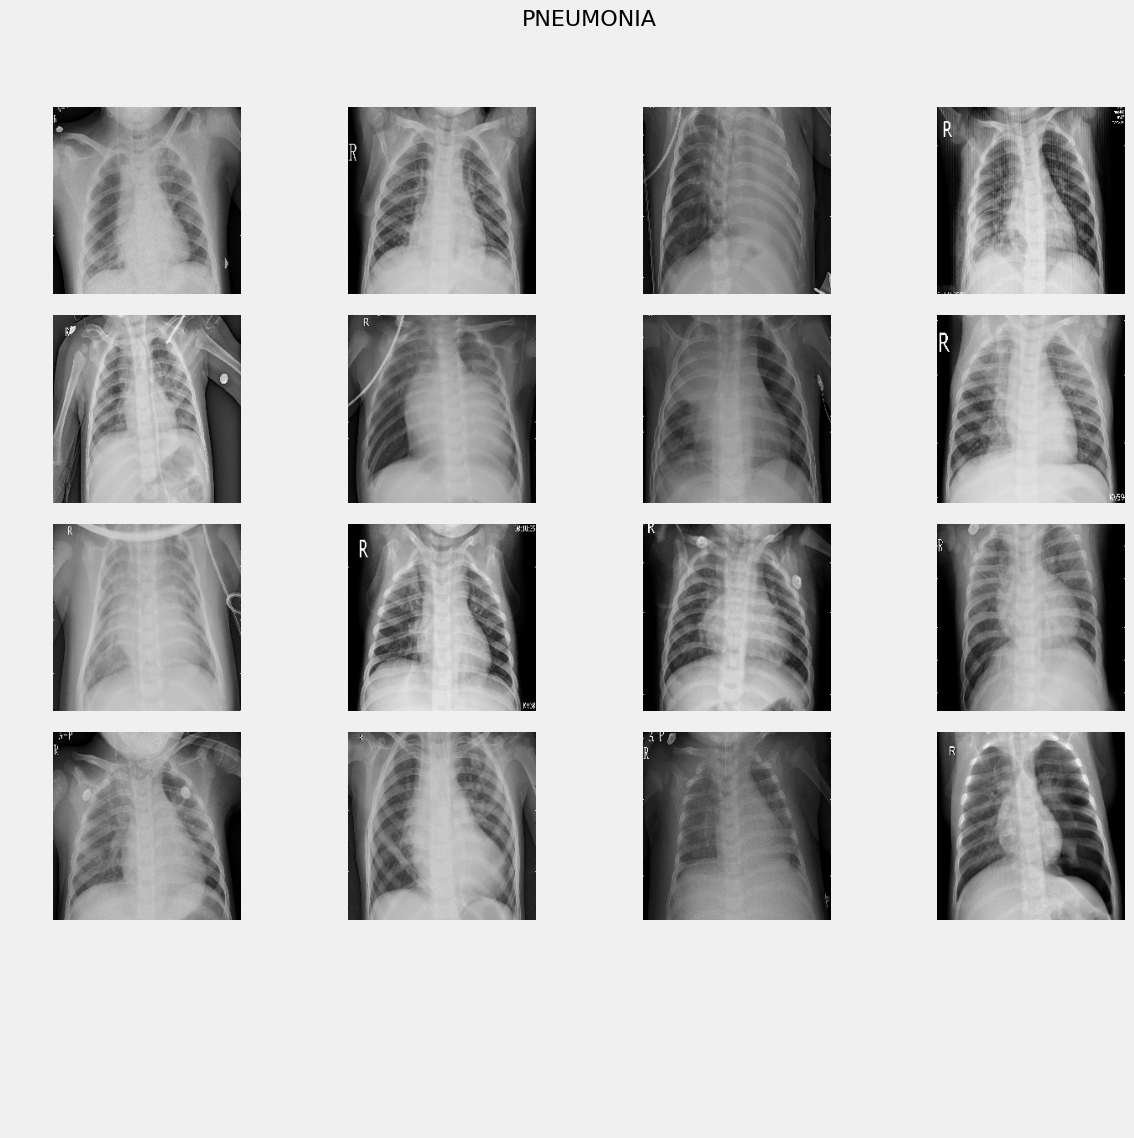

In [20]:
if __name__ == "__main__":
    scrubber = ScrubData(base_dataset_location)

    train_generator = scrubber.create_data_generator('train_downs', scrubber.batch_size_train)
    test_generator = scrubber.create_data_generator('test', scrubber.batch_size_test)
    val_generator = scrubber.create_data_generator('val', scrubber.batch_size_val)

    # Plot sample images
    scrubber.plot_sample_images(train_generator, class_name='NORMAL', num_images=16, num_rows=5, num_cols=4, figsize=(12, 12))
    scrubber.plot_sample_images(train_generator, class_name='PNEUMONIA', num_images=16, num_rows=5, num_cols=4, figsize=(12, 12))


Found 2682 images belonging to 2 classes.
Found 2682 images belonging to 2 classes.


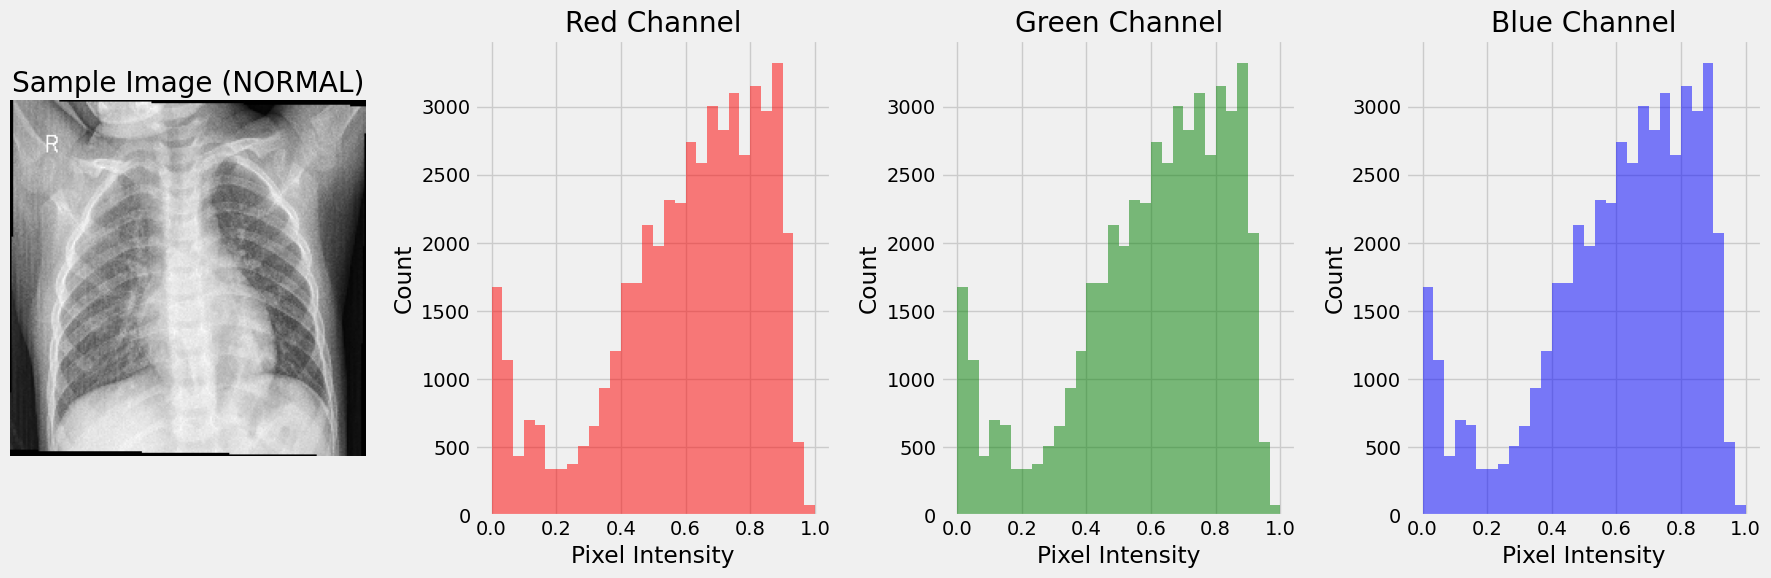

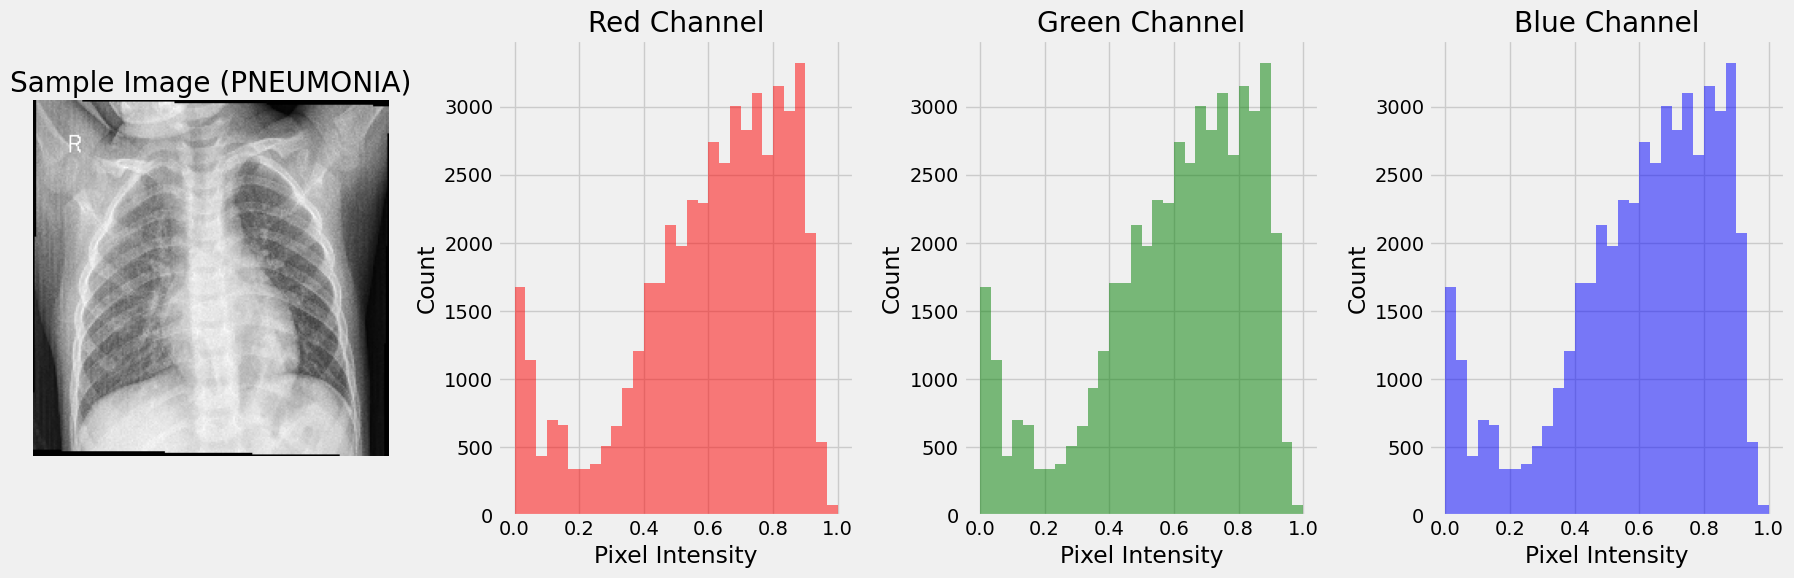

In [21]:
# Create data generators for each class
normal_generator = scrubber.create_data_generator('train_downs', scrubber.batch_size_train['NORMAL'])
pneumonia_generator = scrubber.create_data_generator('train_downs', scrubber.batch_size_train['PNEUMONIA'])

# Get a batch of sample data from each generator
normal_batch_images, _ = next(normal_generator)
pneumonia_batch_images, _ = next(pneumonia_generator)

# Function to plot sample image and histograms
def plot_sample_with_histograms(sample_image, class_name):
    plt.figure(figsize=(18, 6))

    # Plot sample image
    plt.subplot(1, 4, 1)
    plt.imshow(sample_image)
    plt.title(f'Sample Image ({class_name})')
    plt.axis('off')

    # Plot histograms
    for i, channel in enumerate(['Red', 'Green', 'Blue']):
        plt.subplot(1, 4, i + 2)
        plt.hist(sample_image[:, :, i].flatten(), bins=30, color=channel.lower(), alpha=0.5)
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Count')
        plt.title(f'{channel} Channel')

    plt.tight_layout()
    plt.show()

# Plot sample image with histograms for NORMAL class
plot_sample_with_histograms(normal_batch_images[0], 'NORMAL')

# Plot sample image with histograms for PNEUMONIA class
plot_sample_with_histograms(pneumonia_batch_images[0], 'PNEUMONIA')

# Model

## Brief introduction to CNNs

The way animals understand images is a fascinating  process. According to Sarvamangala and Kulkarni (click [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7778711/#CR9) for full text), a Convolutional Neural Networks is a deep learning algorithm that is inspired by the visual cortex of animal brains and aims to imitate the visual machinery of animals. CNNS have convolution layers, activation functions, pooling and fully connected laryers as their building blocks and are made of convolution have learnable weights and biases similar to neurons.

### Baseline Model Introduction
We are using a baseline Convolutional Neural Network (CNN) model to classify images as either being in one of two classes: PNEUMONIA or NORMAL. This model serves as a starting point for image classification with deep learning project and helps to establish a performance baseline against which we can compare more advanced models or techniques.

### Model Description
- **Name**: Baseline CNN Model
- **Purpose**: The baseline model is designed to correctly classify images into one of two classes _'NORMAL'_ or _'PNEUMONIA'_
- **Architecture**: The model architecture consists of several layers, including convolutional layers for feature extraction, pooling layers for downsampling, and fully connected layers for classification.
- **Input Shape**: The model expects input data in the shape of [(224, 224, 3)]
- **Output**: The model produces 2 output classes, and it uses the softmax activation function for multi-class classification.

### Key Components
- **Convolutional Layers**: The model includes 3 convolutional layers with ReLU activation functions, which learn spatial features from the input data.

    1. conv2d_6: This is the first convolutional layer with 32 filters.
    2. conv2d_7: This is the second convolutional layer with 64 filters.
    3. conv2d_8: This is the third convolutional layer with 128 filters.

- **Pooling Layers**: Max-pooling layers are used for spatial down-sampling, reducing the spatial dimensions of the feature maps. There are 3 max-pooling layers:

  1. max_pooling2d_6:

    * Input Shape: (None, 222, 222, 32)
    * Output Shape: (None, 111, 111, 32)
    * Description: This max-pooling layer follows the first convolutional layer (conv2d_6). It takes the feature maps produced by conv2d_6 with a size of (222, 222, 32) and reduces their spatial dimensions by a factor of 2. As a result, the output shape becomes (111, 111, 32).

  2. max_pooling2d_7:

    * Input Shape: (None, 109, 109, 64)
    * Output Shape: (None, 54, 54, 64)
    * Description: This max-pooling layer follows the second convolutional layer (conv2d_7). It takes the feature maps produced by conv2d_7 with a size of (109, 109, 64) and reduces their spatial dimensions by a factor of 2. The output shape becomes (54, 54, 64).

  3. max_pooling2d_8:

    * Input Shape: (None, 52, 52, 128)
    * Output Shape: (None, 26, 26, 128)
    * Description: This max-pooling layer follows the third convolutional layer (conv2d_8). It takes the feature maps produced by conv2d_8 with a size of (52, 52, 128) and reduces their spatial dimensions by a factor of 2. The output shape becomes (26, 26, 128)

- **Flatten Layer**: After feature extraction, the flatten layer transforms the 2D feature maps into a 1D vector.
- **Fully Connected Layers**: Dense layers with ReLU activation functions are used for classification.
- **Dropout**: Dropout layers are added to mitigate overfitting during training.

### Data Preprocessing
- **Data Generators**: We use data generators to load and preprocess training and testing data.
- **Data Augmentation**: Data augmentation techniques, such as rotation, shifting, shearing, and flipping, are applied to increase the diversity of training examples.

### Training
- **Optimizer**: The model is trained using the Adam optimizer.
- **Loss Function**: We use sparse categorical cross-entropy as the loss function for this multi-class classification task.
- **Metrics**: During training and evaluation, we monitor accuracy and other relevant metrics.

## Training History
- We train the baseline model for 25 epochs and monitor its performance on both the training and validation datasets.
- The training history includes metrics like accuracy, loss, precision, recall, and F1-score.


The baseline model serves as a foundation for our project. We will explore various strategies to improve its performance, such as hyperparameter tuning, model architecture adjustments, and data augmentation techniques.
The baseline model provides a starting point for our project, and its performance metrics will be used as a reference to evaluate the effectiveness of future improvements. As we proceed, we aim to develop more advanced models and techniques to achieve higher accuracy and robustness in solving the task at hand.

In [22]:
# Create an instance of the DatasetPaths class
dataset_paths = DatasetPaths(base_dataset_location)

# Define the set name and class name
train_set_name = 'train_downs/'
test_set_name = 'test'
val_set_name = 'val'

# Get the complete train_data_path using the DatasetPaths class
train_data_path = dataset_paths.get_single_path(train_set_name)

# Get the complete test_data_path using the DatasetPaths
test_data_path = dataset_paths.get_single_path(test_set_name)

# Get the complete val_data_path using the DatasetPaths class
val_data_path = dataset_paths.get_single_path(val_set_name)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Set image dimensions and classes
input_shape = (224, 224, 3)
num_classes = 2

# Create data generators for train and test sets
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_generator.flow_from_directory(
    train_data_path ,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='binary'
)

test_data = test_generator.flow_from_directory(
    test_data_path,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='binary'
)

# Create the baseline CNN model
baseline_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),  # Missing comma here
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
history = baseline_model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=25,
    validation_data=test_data,
    validation_steps=test_data.samples // test_data.batch_size
)

# Evaluate the model on the test data
test_loss, test_accuracy = baseline_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predict labels for the test data
y_pred = baseline_model.predict(test_data)
y_pred_binary = np.argmax(y_pred, axis=1)  # Convert probabilities to binary predictions

# True labels for the test data
y_true = test_data.classes

# Print classification report (F1-score, precision, accuracy, recall)
report = classification_report(y_true, y_pred_binary, target_names=test_data.class_indices)
print("Classification Report: \n", report)

Found 2682 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/25
83/83 [==============================] - 502s 6s/step - loss: 0.6576 - accuracy: 0.7287 - val_loss: 0.6756 - val_accuracy: 0.6694
Epoch 2/25
83/83 [==============================] - 60s 722ms/step - loss: 0.4530 - accuracy: 0.8260 - val_loss: 0.7037 - val_accuracy: 0.6628
Epoch 3/25
83/83 [==============================] - 60s 722ms/step - loss: 0.4001 - accuracy: 0.8483 - val_loss: 0.6549 - val_accuracy: 0.6678
Epoch 4/25
83/83 [==============================] - 60s 727ms/step - loss: 0.3548 - accuracy: 0.8653 - val_loss: 0.5390 - val_accuracy: 0.7237
Epoch 5/25
83/83 [==============================] - 61s 737ms/step - loss: 0.3333 - accuracy: 0.8743 - val_loss: 0.4659 - val_accuracy: 0.7664
Epoch 6/25
83/83 [==============================] - 60s 726ms/step - loss: 0.2948 - accuracy: 0.8925 - val_loss: 0.4753 - val_accuracy: 0.7714
Epoch 7/25
83/83 [==============================] - 60s 725ms

Here we will print a summary of the baseline model.

In [24]:
# Print the summary of the model

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

This section provides an overview of the model's architecture, layer types, and parameter counts. It serves as a quick reference for understanding the model's structure.

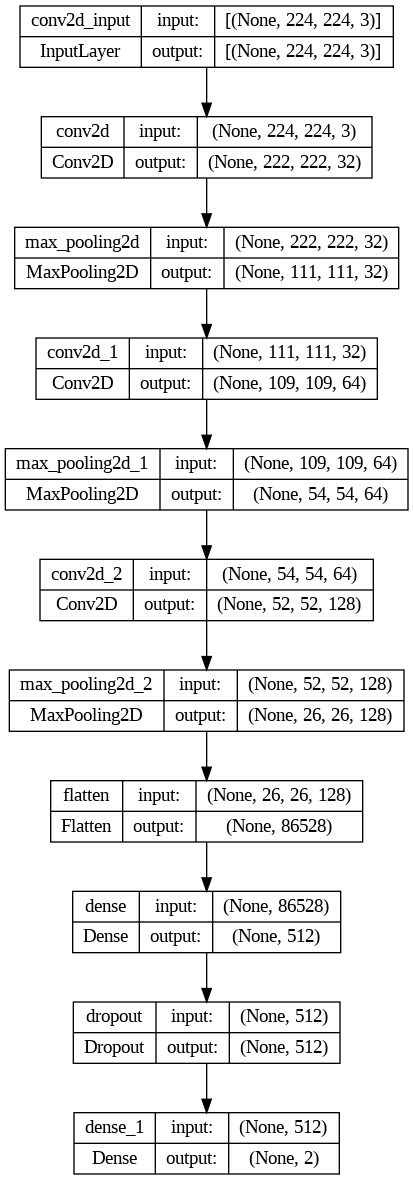

In [25]:
from tensorflow.keras.utils import plot_model
# Save a visualization of the model's architecture to a file
plot_model(baseline_model,
           to_file='baseline_model_architecture.png',
           show_shapes=True,
           show_layer_names=True
           )

In this section, we will evaluate the performance of our trained model by predicting labels for the test dataset and visualizing the results using a confusion matrix. A confusion matrix is a valuable tool for assessing the classification performance, allowing us to understand how well the model is classifying instances into different categories.

We will start by making predictions on the test dataset using our trained model and then generate a confusion matrix. The confusion matrix provides insights into the true positive, true negative, false positive, and false negative predictions made by the model.

20/20 [==============================] - 5s 252ms/step


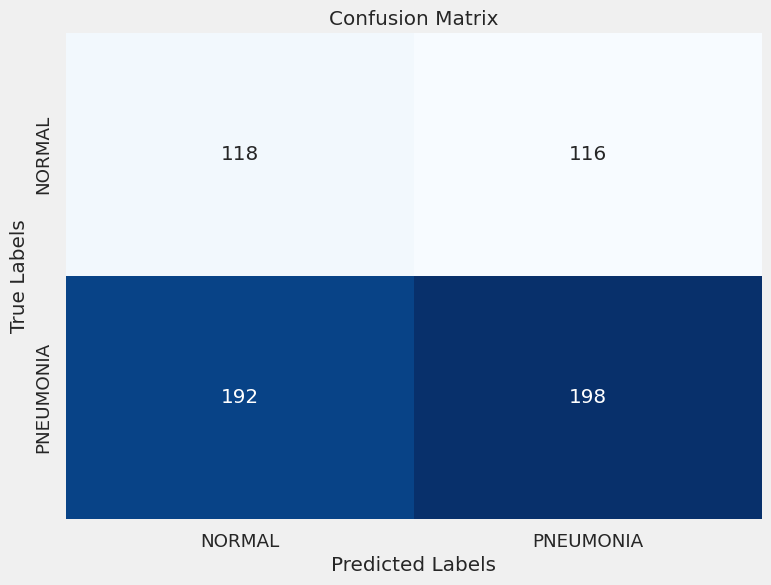

In [26]:
# Predict labels for the test data
y_pred = baseline_model.predict(test_data)
y_pred_binary = np.argmax(y_pred, axis=1)  # Convert probabilities to binary predictions

# True labels for the test data
y_true = test_data.classes

confusion = confusion_matrix(y_true, y_pred_binary)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

### Revised CNN Model
In this section, we will visualize the training progress of our deep learning model by plotting key performance metrics over epochs. The two metrics we'll focus on are accuracy and loss, which provide insights into how well the model is learning and whether it's overfitting or underfitting.

- **Training Accuracy vs. Validation Accuracy**: By plotting these curves, we can assess how well the model generalizes to unseen data. An increasing training accuracy with a decreasing validation accuracy could indicate overfitting.

- **Training Loss vs. Validation Loss**: Monitoring the loss curves helps us understand the convergence and stability of the model during training. Ideally, both training and validation loss should decrease over epochs.

Let's visualize the training and validation accuracy, as well as the training and validation loss, to gain a better understanding of our model's performance.

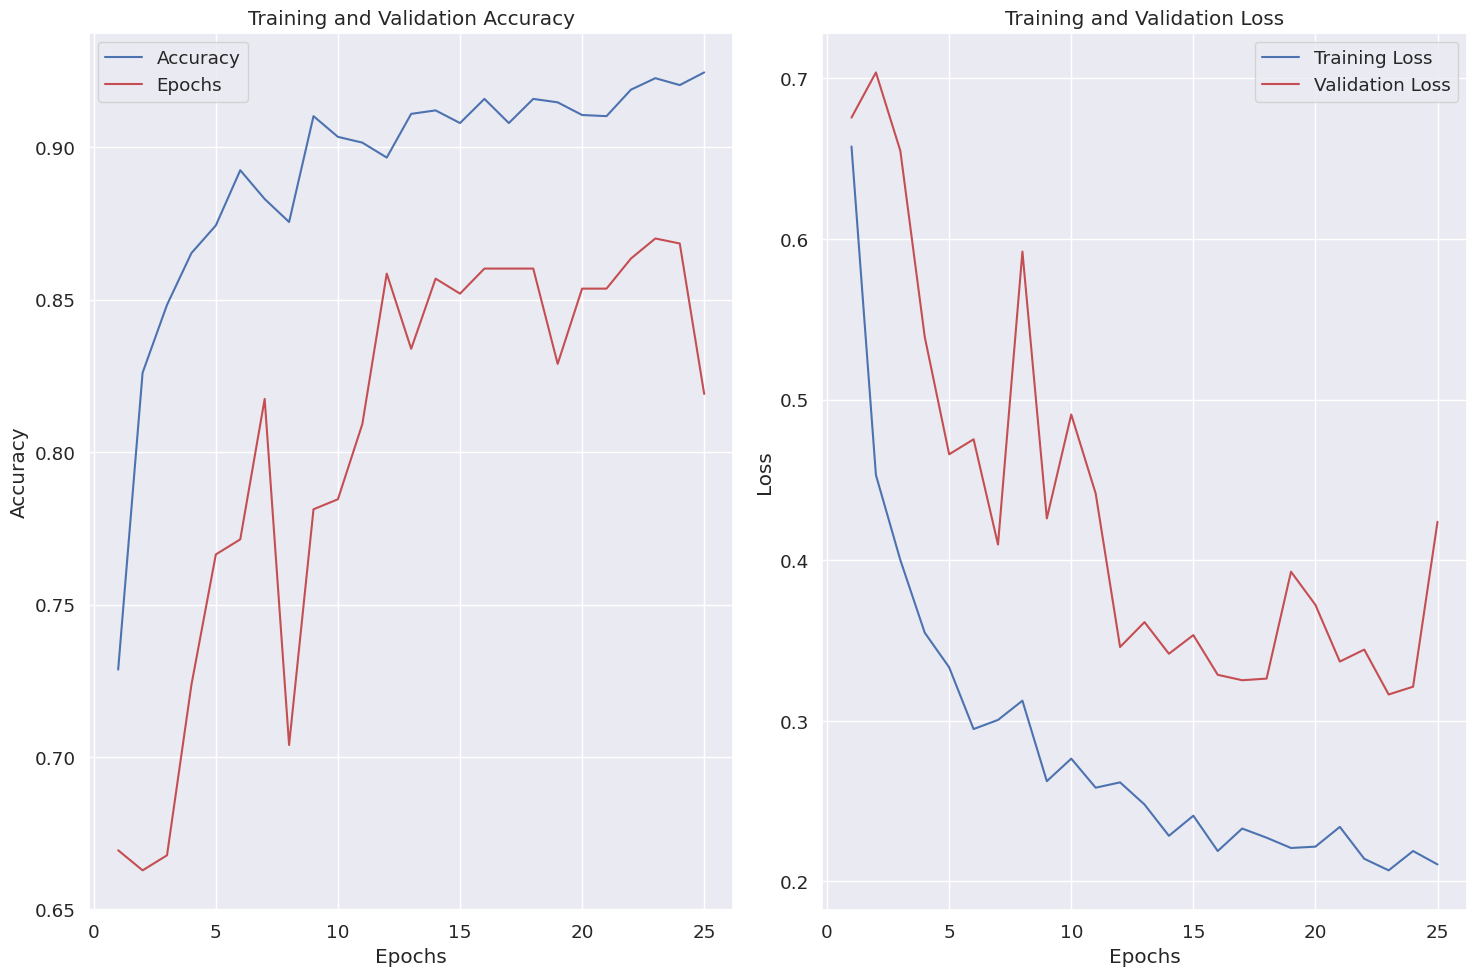

In [27]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(15, 10))

# Plot precision vs. epoch
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Epochs')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss vs. epoch
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In this section, we make improvements to the Convolutional Neural Network (CNN) model for image classification and evaluate its performance. We employ the following techniques to enhance the model's performance:

- **Early Stopping**: We introduce an early stopping mechanism to monitor the validation loss during training. If the validation loss does not improve for a certain number of epochs, training is stopped early, preventing overfitting and saving time.

- **Revised CNN Model**: We redefine the CNN architecture by adding more convolutional layers and fully connected layers to potentially capture more intricate patterns and features in the data.

- **Increased Epochs**: We increase the number of training epochs to allow the model to learn from the data for a longer duration, potentially improving its performance.

- **Model Evaluation**: After training the revised model, we evaluate its performance using various metrics, including accuracy, loss, F1-score, precision, and recall. We also provide a classification report to gain insights into the model's performance across different classes.

In [28]:
from keras.layers.attention.multi_head_attention import activation
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,           # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best model weights
)

# Create a revised CNN Model
revised_model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the revised model
revised_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the revised model with a higher number of epochs
history = revised_model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=50, # Increased number of epochs
    validation_data=test_data,
    validation_steps=test_data.samples // test_data.batch_size,
    callbacks=[early_stopping]  # Add early stopping
)

# Evaluate the revised model on the test data
test_loss, test_accuracy = revised_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predict labels for the test data
y_pred = revised_model.predict(test_data)
y_pred_binary = np.argmax(y_pred, axis=1) # Convert probabiities to binary

# True labels for the test data
y_true = test_data.classes

# Print classification report(F1-score, precision, accuracy, recall)
report = classification_report(y_true, y_pred_binary, target_names=test_data.class_indices)
print("Revised Model Classification Report: \n", report)

Epoch 1/50
83/83 [==============================] - 65s 734ms/step - loss: 0.7456 - accuracy: 0.7223 - val_loss: 0.6479 - val_accuracy: 0.7253
Epoch 2/50
83/83 [==============================] - 60s 719ms/step - loss: 0.4414 - accuracy: 0.8170 - val_loss: 0.5497 - val_accuracy: 0.7303
Epoch 3/50
83/83 [==============================] - 60s 722ms/step - loss: 0.3689 - accuracy: 0.8475 - val_loss: 0.4562 - val_accuracy: 0.7763
Epoch 4/50
83/83 [==============================] - 59s 711ms/step - loss: 0.3412 - accuracy: 0.8630 - val_loss: 0.4410 - val_accuracy: 0.7648
Epoch 5/50
83/83 [==============================] - 60s 717ms/step - loss: 0.3293 - accuracy: 0.8653 - val_loss: 0.4572 - val_accuracy: 0.7993
Epoch 6/50
83/83 [==============================] - 59s 715ms/step - loss: 0.3064 - accuracy: 0.8800 - val_loss: 0.3758 - val_accuracy: 0.8289
Epoch 7/50
83/83 [==============================] - 60s 722ms/step - loss: 0.3105 - accuracy: 0.8872 - val_loss: 0.4705 - val_accuracy: 0.7681

In [ ]:
# Print the summary of the revised model

revised_model.summary()

Next, We will visualize the architecture of our revised model using the `plot_model` function provided by Keras. This function creates a visual representation of the neural network's layers, including their shapes and names. We'll save this visualization as an image file for reference.

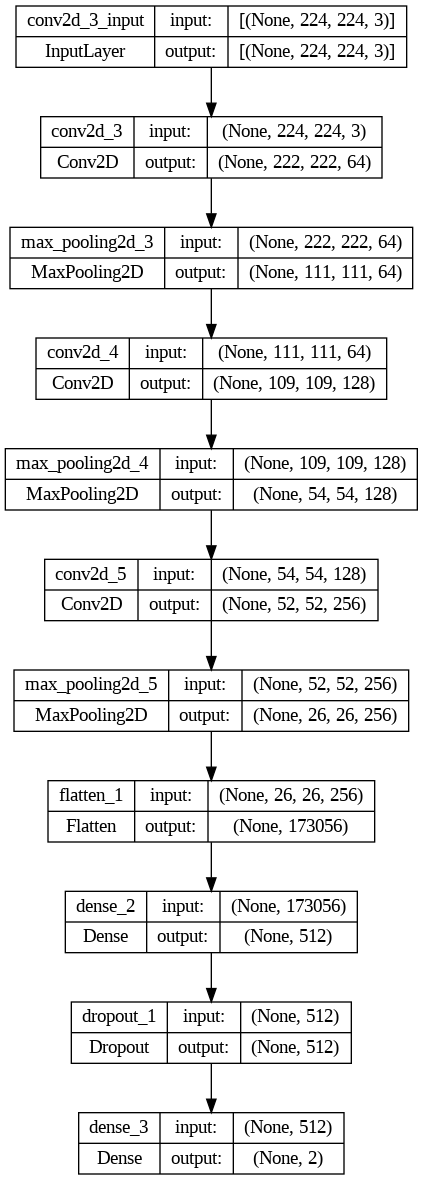

In [29]:
from tensorflow.keras.utils import plot_model
# Save a visualization of the model's architecture to a file
plot_model(revised_model,
           to_file='revised_model_architecture.png',
           show_shapes=True,
           show_layer_names=True
           )

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=15,           # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best model weights
)

# Create the third revised CNN Model (reflecting PEP8 compliance)
revised_model_2 = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compile the third revised model
revised_model_2.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Train the third revised model with a higher number of epochs
history = revised_model_2.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=100,  # Increased number of epochs
    validation_data=test_data,
    validation_steps=test_data.samples // test_data.batch_size,
    callbacks=[early_stopping]  # Add early stopping
)

# Evaluate the third revised model on the test data
test_loss, test_accuracy = revised_model_2.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predict labels for the test data using the third revised model
y_pred = revised_model_2.predict(test_data)
y_pred_binary = np.argmax(y_pred, axis=1)  # Convert probabilities to binary

# True labels for the test data
y_true = test_data.classes

# Print classification report (F1-score, precision, accuracy, recall)
report = classification_report(y_true, y_pred_binary, target_names=test_data.class_indices)
print("Third Revised Model Classification Report: \n", report)

Epoch 1/100
83/83 [==============================] - 62s 727ms/step - loss: 0.8842 - accuracy: 0.6909 - val_loss: 0.5478 - val_accuracy: 0.7237
Epoch 2/100
83/83 [==============================] - 60s 726ms/step - loss: 0.3830 - accuracy: 0.8472 - val_loss: 0.4533 - val_accuracy: 0.7878
Epoch 3/100
83/83 [==============================] - 59s 714ms/step - loss: 0.3576 - accuracy: 0.8532 - val_loss: 0.4885 - val_accuracy: 0.7862
Epoch 4/100
83/83 [==============================] - 60s 716ms/step - loss: 0.3567 - accuracy: 0.8570 - val_loss: 0.5448 - val_accuracy: 0.7516
Epoch 5/100
20/83 [======>.......................] - ETA: 41s - loss: 0.3403 - accuracy: 0.8719

In [ ]:
# Print the summary of the revised model

revised_model_2.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
# Save a visualization of the model's architecture to a file
plot_model(revised_model_2, to_file='revised_model_2_architecture.png', show_shapes=True,show_layer_names=True)

# Interpret